In [1]:
# Take in the CSV files and extract them into lists
import csv

def fileExtract(name):
# Open the CSV file for the NYC data and create a reader object
    with open(name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Create two empty lists to store the data
        indices = []
        data = []

        # Iterate over each row in the CSV file
        for row in csv_reader:
            # Add the index to the indices list
            indices.append(len(indices))
            # Add the row data to the data list
            data.append((row[1]))
    
        # Remove the zero term and column title from the CSV file
        temp = [float(x) for x in data[1:]]
        return temp


In [2]:
# Calculate the moving averages of a given step size
import numpy as np
import matplotlib.pyplot as plt

def moving_average(lst, window_size):
    # Initialize an empty list to hold the moving averages
    averages = []
    
    # Loop through the list using a sliding window of size window_size
    for i in range(len(lst) - window_size + 1):
        # Extract the subset of the list
        subset = lst[i:i+window_size]
        
        # Calculate the average of the subset
        avg = sum(subset) / window_size
        
        # Append the average to the list of averages
        averages.append(avg)
    
    return averages


In [3]:
# Prepare the lists to be predicted and actual values that a regression can be completed on
def dataTrim(window_size,temp):
    predict = moving_average(temp,window_size)[:len(moving_average(temp,window_size))-365]
    temp = temp[window_size-1:]
    actual = temp[365:]
    return [predict, actual]

In [4]:

def linres(dat,name):
    x = np.array(dat[0])
    y = np.array(dat[1])

    # Calculate the slope and y-intercept of the regression line
    slope, intercept = np.polyfit(x, y, 1)

    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # Plot the data points and the regression line
    plt.scatter(x, y)
    plt.plot(x, slope*x + intercept, color='r')

    # Set the axis labels and title
    plt.xlabel('SMA_Predicted Temperature')
    plt.ylabel('Actual_Temperature')
    plt.title(name)

    # Print the slope, y-intercept, and correlation coefficient
    print()
    print('Slope:', slope)
    print('Y-intercept:', intercept)
    print('R^2:', (corr_coef**2))

    # Display the plot
    plt.show()
    print()


Slope: 0.9429824247643216
Y-intercept: 3.6126016664670977
R^2: 0.7966704871656497


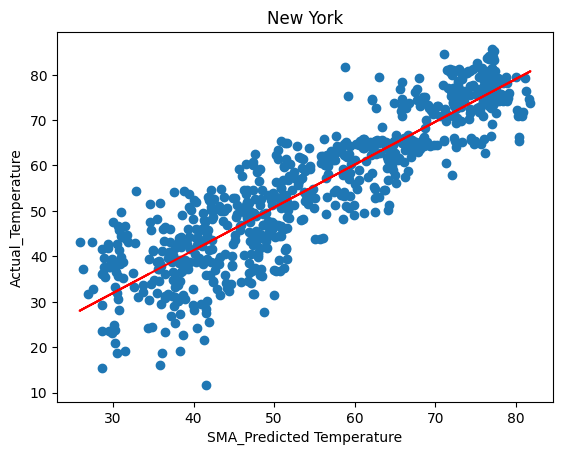



Slope: 0.8926204746371411
Y-intercept: 5.497434147501302
R^2: 0.7237195962764877


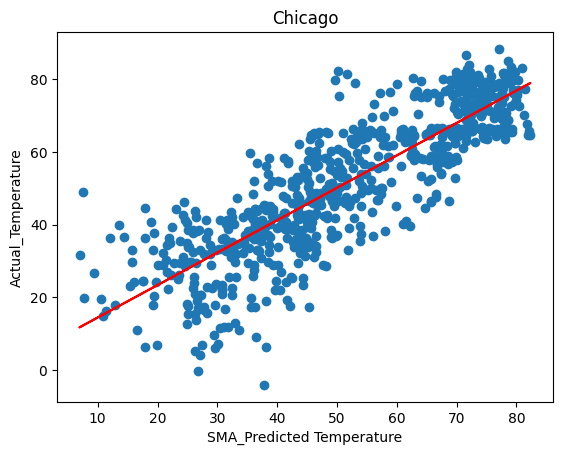



Slope: 0.9267802772661701
Y-intercept: 4.856817246867607
R^2: 0.7535868598362683


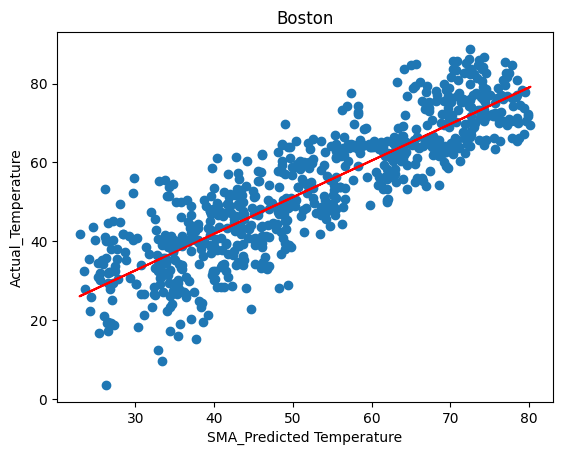



Slope: 0.9350229865177864
Y-intercept: 4.542018126287297
R^2: 0.765785566784645


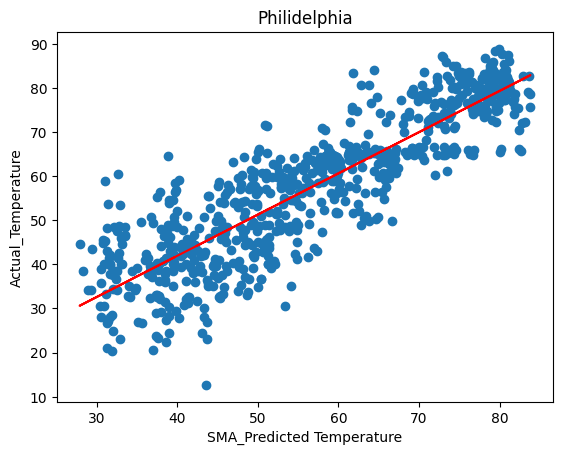



Slope: 0.9558976337343361
Y-intercept: 1.7901770667068704
R^2: 0.6424958079898916


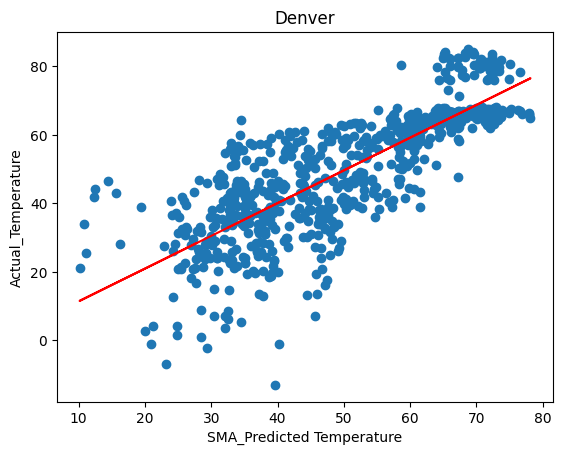



Slope: 0.8925824967890097
Y-intercept: 7.340898233136447
R^2: 0.6839418484631165


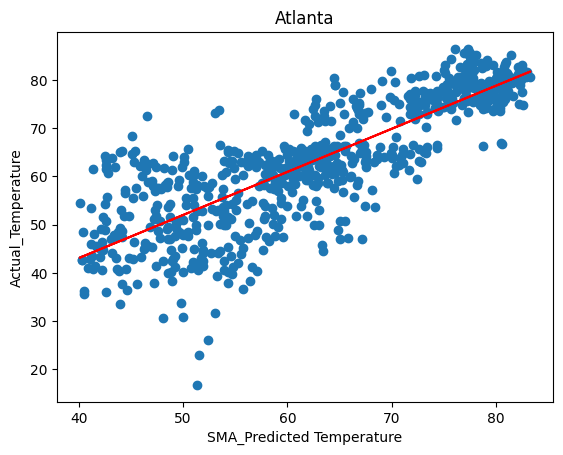



Slope: 0.9622461764256944
Y-intercept: 1.580575470238135
R^2: 0.7807663525257632


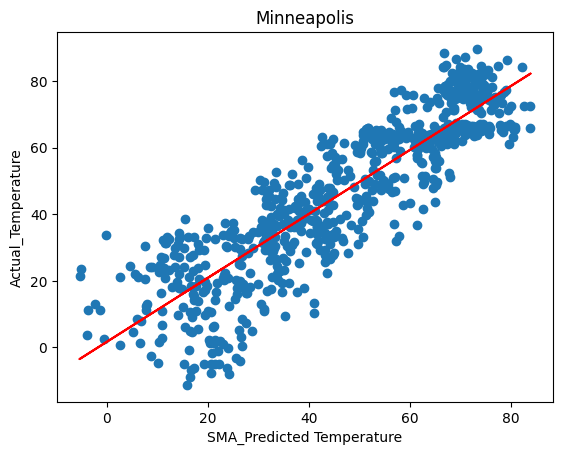



Slope: 0.9236503668402194
Y-intercept: 4.903528556249286
R^2: 0.8216177330073695


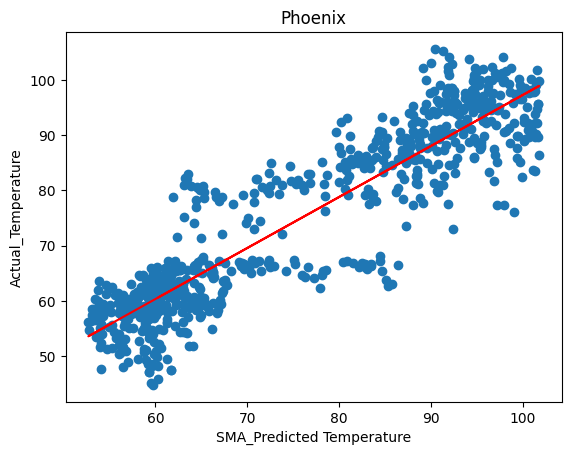



Slope: 0.9087348372824979
Y-intercept: 4.2718454681633435
R^2: 0.7726620985293873


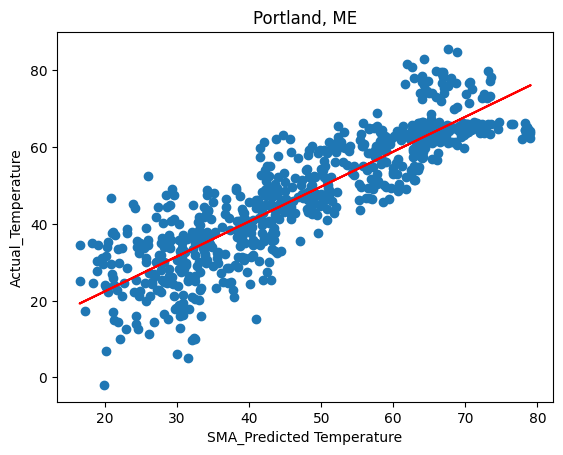



Slope: 0.9114653492242525
Y-intercept: 5.963762787240527
R^2: 0.5980943209174306


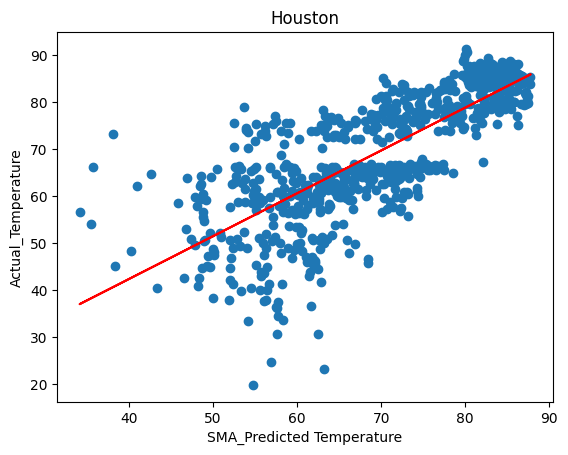



Slope: 0.909445341837997
Y-intercept: 5.041585473740309
R^2: 0.7518032798640393


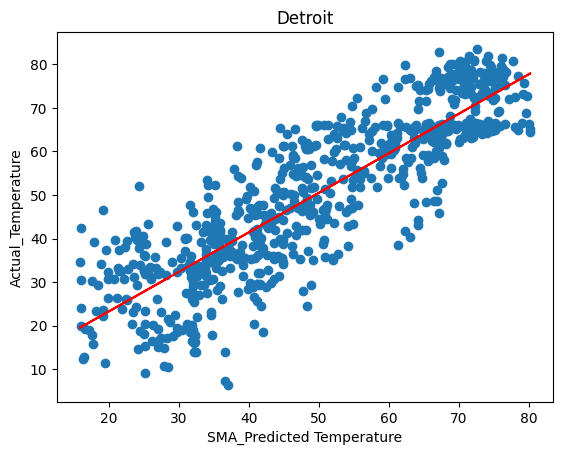

In [5]:
# Calculate and ouput the R^2 for values for various SMA step sizes
windows = [10]
names = [['New York', 'KJFK_Temps_Last36.csv'], ['Chicago', 'KORD_Temps_Last36.csv'], ['Boston', 'KBOS_Temps_Last36.csv'],['Philidelphia', 'KPHL_Temps_Last36.csv'],['Denver', 'KDEN_Temps_Last36.csv'],['Atlanta', 'KATL_Temps_Last36.csv'],['Minneapolis', 'KMSP_Temps_Last36.csv'],['Phoenix', 'KPHX_Temps_Last36.csv'],['Portland, ME', 'KPWM_Temps_Last36.csv'],['Houston', 'KIAH_Temps_Last36.csv'],['Detroit', 'KDTW_Temps_Last36.csv']]

for name in names:
    for window in windows:
        linres(dataTrim(window,fileExtract(name[1])),name[0])
   
    
